In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


# Problem 1 - Decision Trees (Lending)

In [2]:
df = pd.DataFrame()

In [3]:
a = np.arange(0,1, 0.01)

In [4]:
df['p']=a

In [5]:
low= [1000- 5000*p for p in a]
high= [-2750*p+ 750 for p in a]
dont_fund= 0 *(len(high))

In [6]:
df['Low_int']= low
df['High_int']=high
df['Dont_Fund']=dont_fund

(-1500.0, 1000.0)

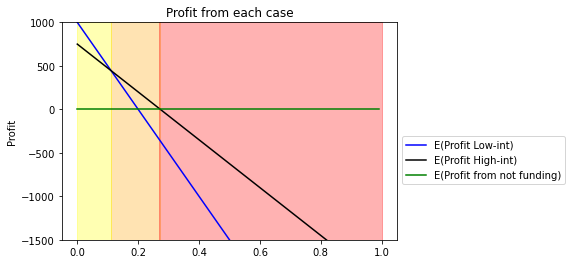

In [7]:
t= a
plt.plot(t,df['Low_int'], "-b", label ="E(Profit Low-int)")
plt.plot(t,df['High_int'],"-k", label = "E(Profit High-int)")
plt.plot(t,df['Dont_Fund'],"-g", label = "E(Profit from not funding)")

plt.fill_betweenx(df['Low_int'], x1=0.11, x2=0.2727, color='orange', alpha=0.3)
plt.fill_betweenx(df['Low_int'], x1=0, x2=0.11, color='yellow', alpha=0.3)
plt.fill_betweenx(df['Low_int'], x1=0.27, x2=1, color='red', alpha=0.3)

plt.ylabel('Profit')
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 0.5))
plt.title("Profit from each case")

plt.ylim(-1500,1000)

c) As we see in the above figure, the yellow region highlights the values of 'p' for which funding the low-interest loan is the optimal decision; the orange shaded region highlights the values of 'p' for which funding the high-interest loan is the optimal decision, and the red shaded region highlights the values of 'p' for which not funding a loan is the optimal decision.

d) To estimate the parameter "p" I would run a logistic regression model that would predict the probability of default based on certain traits of a borrower. This would give me an estimate of the parameter "p" for each borrower. Then, to estimate parameter "q" I would run another logistic regression model to predict the probability of agreeing to this high-interest loan. This model would use traits of the borrower and of the loan as predictors. My dataset for creating these models would have to include borrower traits such as credit score, current income, employment, education, among other and loan features such as whether the loan was funded, interest rate on the loan, and the status of default. 
<br>
Another method could be to try and employ a decision tree method.

# Problem 2: Framingham Heart Study

In [8]:
import os
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [9]:
train = pd.read_csv("framingham_train.csv")
test= pd.read_csv("framingham_test.csv")


In [10]:
train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,46,High school/GED,0,0,0,0,0,0,225,116.0,79.0,29.21,60,70,0
1,0,37,Some college/vocational school,1,20,0,0,0,0,254,119.0,62.5,28.78,70,69,0
2,1,60,Some high school,0,0,0,0,1,0,270,145.0,81.0,29.37,75,73,0
3,0,66,Some high school,0,0,1,0,1,0,290,152.5,90.0,23.63,80,76,0
4,0,36,High school/GED,0,0,0,0,0,0,212,102.0,69.0,33.36,55,71,0


In [11]:
model1 = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose',
                       data = train).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.379082
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.1145
Time:                        11:11:42   Log-Likelihood:                -970.45
converged:                       True   LL-Null:                       -1095.9
Covariance Type:            nonrobust   LLR p-value:                 1.348e-43
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

### iv) Evaluating the test set peformance of our model based on p-bar = 28/255


In [12]:
y_test = test['TenYearCHD']
y_prob = model1.predict(test)
y_pred = pd.Series([1 if x > 28/255 else 0 for x in y_prob], index=y_prob.index)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[488 445]
 [ 32 133]]


In [31]:
# Accuracy = (TN+TP)/N
accuracy_model = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())

# TPR = TP/(TP+FN)
tpr_model = (cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2]))

# FPR = FP/(TN+FP)
fpr_model = (cm.ravel()[1]/(cm.ravel()[0]+cm.ravel()[1]))

print('Accuracy:', accuracy_model)
print('TPR:', tpr_model)
print('FPR:', fpr_model)

Accuracy: 0.5655737704918032
TPR: 0.806060606060606
FPR: 0.4769560557341908


This model's accuracy indicates the percentage of individuals correctly classified as either experiencing or not experiencing CHD within the next 10 years. TPR represents the percentage of individuals correctly identified by our model as experiencing CHD within the next 10 years among those who actually experienced it. On the flip side, FPR represents the percentage of individuals correctly identified by our model as not experiencing CHD within the next 10 years among those who actually did not experience it.

### v) Estimating cost per patient

### Cost per patient is given by: (in the case when outcomes are not affected by treatment decisions)
#### Total Cost= $(820000 * TP) + (70000 * FP) + (750000 * FN) + (0 * TN)$
               = (820000 * 133) + (70000 * 445) + (750000 * 32) + (0)
              = 164210000$
              
#### Cost per patient = 164210000 / 1098
                  = 149553.73 $/patient
                 

### Cost per patient is given by: (in the case when outcomes are affected by treatment decisions)
To account for the probability in our test set, we multiply $0.85*TP = 0.85*133 = 113.05 = 113$ patients who would have received the medication and would have not experienced CHD into our false positive (FP) count.
#### Total Cost= $(820000 * TP) + (70000 * FP) + (750000 * FN) + (0 * TN)$
              = (820000 * 20) + (70000 * 458) + (750000 * 32) + (0)
              = 72460000 $
              
#### Cost per patient = 72460000 / 1098
                  = 65922.714 $/patient

### vi) Test set performance of the baseline model in terms of accuracy, TPR, and FPR, as well as expected economic cost per patient

In [32]:
# Accuracy = # correct / total number (Lab 3)
defaultfalsetest = np.sum(test['TenYearCHD'] == 0)
defaulttruetest = np.sum(test['TenYearCHD'] == 1)
accuracybaseline = defaultfalsetest/(defaultfalsetest+defaulttruetest)

# TPR
tpr_baseline = 0 / (0 + defaulttruetest)

# FPR
fpr_baseline = 0 / (0 + defaultfalsetest)

print('Accuracy:', accuracybaseline)
print('TPR:', tpr_baseline)
print('FPR:', fpr_baseline)

Accuracy: 0.8497267759562842
TPR: 0.0
FPR: 0.0


In [33]:
defaultfalsetest, defaulttruetest

(933, 165)

### Expected cost per patient

Calculating the expected cost per patient of our baseline model is as follows:
Total cost = 750000 * FN = 750000 * 165 = 123750000 $

<br> Cost per patient = 123750000/1098 = 112704.91 $/patient

Accuracy of the baseline model is fairly high because we predict all individuals to not experience CHD, and, in reality, only a few individuals ended up experiencing CHD. 
TPR and FPR are equal to zero because our model does not predict any individual to develop CHD, meaning there are no TPs or FPs.
The cost per patient comes entirely from the 750,000$ incurred due to the FNs. 

### vii) Predicting using given parameters

In [34]:
given = pd.DataFrame(data = {'male' : [0], 'age' : [40], 'education' : ['High school/GED'], 'currentSmoker' : [0], 
                               'cigsPerDay' : [0], 'BPMeds' : [1], 'prevalentStroke' : [1], 'prevalentHyp' : [1], 
                               'diabetes' : [0], 'totChol' : [310], 'sysBP' : [130], 'diaBP' : [95], 'BMI' : [31.5], 
                               'heartRate' : [74], 'glucose' : [95]})

print('Predicted probability of experiencing CHD in the next 10 years:', model1.predict(given)[0])

Predicted probability of experiencing CHD in the next 10 years: 0.11794319302215646


#### Based on our threshold value of p-bar = 0.109, this person should be prescribed the medication as predicted probability = 0.117 > p-bar=0.109

### b) ROC and AUC

In [35]:
from sklearn.metrics import roc_curve, auc

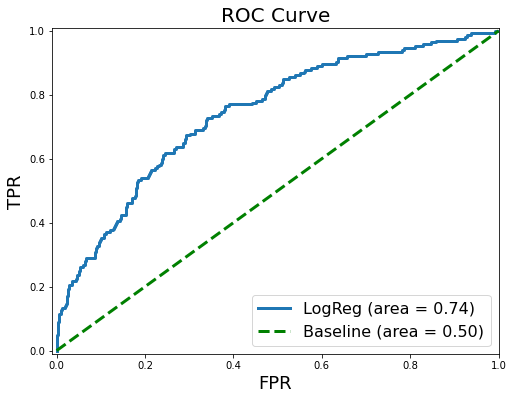

In [36]:
# Inspired by Lab 4
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=20)
plt.xlabel('FPR', fontsize=18)
plt.ylabel('TPR', fontsize=18)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogReg (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='green', lw=3, linestyle='--', label='Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=16)
plt.show()

In [37]:
print('AUC of the above =', roc_auc)

AUC of the above = 0.7437851180616454


#### Answer)
<br>
The ROC curves show the trade-off between the TPR and FPR as we vary our threshold value p-bar. I don't think our ROC curve is that good since we would want a simultaneously high TPR and low FPR, which refers to the top left region of the above graph but our curve does not reach there.  

The curve could provide decision-makers with valuable insights into the effectiveness of the predictor variables used in the current model. It could aid in their ongoing research on medication for CHD by guiding them on how to improve the current model or explore new medication forms. A more effective model could be developed by using the significant predictors from this model along with new features, and a more effective medication could be aimed at treating the symptoms of these significant predictors. Moreover, decision-makers could use the AUC to evaluate the effectiveness of a new medication, as it indicates the model's discriminative ability. A higher AUC value would indicate a better medication.

AUC of our logistic regression model (=0.7437) is only slightly better than the AUC of the baseline model (=0.50). With a likelihood equal to 0.50, our baseline model is basically tossing a fair coin.  This is fascinating because even though the logreg model is much more complex, the AUC it yields could still be imporved upon and is not leaps and bounds better than the baseline. 

#### c) Handwritten attached.

#### d) Ethical Concerns: 
<br>
When I was reading more about the Framingham heart study, I quickly realised that due to the study being focused on a small and homogenous town (primarily white participants), the results of such a model could not be generalised to meet a much more diverse population. Since an overwhelming majority of the participants were White, the study does not have a large enough sample size to make strong claims about the probability of CHD amongst people of other races. We also don't know the selection criteria of the participants. This could be indicative of an even greater bias towards White participants. Thus, the set-up of the study prevents it from making any strong claims about minorities. If I was to re-do the study today, I would make sure that the target town I pick has a good balance of different racial background to ensure racial diversity. In doing so, I would be able to create a model that can generalise well to the greater population. 